In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("loan.csv", low_memory=False)

In [3]:
df.shape

(39717, 111)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Cleaning

### Dropping columns with mostly null values

In [5]:
nullcols = df.isnull().mean()[df.isnull().mean()*100>40]*100
nullcols

mths_since_last_delinq             64.662487
mths_since_last_record             92.985372
next_pymnt_d                       97.129693
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_il                      100.000000
il_util                           100.000000
open_rv_12m                       100.000000
open_rv_24m                       100.000000
max_bal_bc                        100.000000
all_util                          100.000000
total_rev_hi_lim                  100.000000
inq_fi                            100.000000
total_cu_t

In [6]:
for col in nullcols.index:
    df.drop(col, axis=1, inplace=True)

In [7]:
df.shape

(39717, 54)

In [8]:
pd.set_option("display.max_columns", None)

In [9]:
df.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11 Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan 85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,15 Jan,171.62,16 May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### Segregating columns as category, continous and extra

In [10]:
cat_cols = ["term","grade","sub_grade","home_ownership","verification_status","purpose","addr_state","issue_d",
            "earliest_cr_line","last_pymnt_d","last_credit_pull_d","loan_status"]
cont_cols = ["loan_amnt","funded_amnt","funded_amnt_inv","int_rate","installment","emp_length","annual_inc",
             "dti","delinq_2yrs","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","total_acc",
             "out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int",
             "total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_amnt",
             "pub_rec_bankruptcies","zip_code","loan_status"]
extra_cols = ["id","member_id","emp_title","url","desc","title","collections_12_mths_ex_med","policy_code","pymnt_plan",
              "initial_list_status","application_type","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","tax_liens"]

#### Dropping extra columns
##### Following columns are also dropped because they have same value in all rows. (not usefull)<br> pymnt_plan, initial_list_status, collections_12_mths_ex_med, policy_code, application_type, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, tax_liens 

In [11]:
for col in extra_cols:
    df.drop(col, axis=1, inplace=True)

In [12]:
df.shape

(39717, 39)

In [13]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,11 Dec,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan 85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,15 Jan,171.62,16 May,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,11 Dec,Charged Off,car,309xx,GA,1.00,0,Apr 99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,13 Apr,119.66,13 Sep,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,11 Dec,Fully Paid,small_business,606xx,IL,8.72,0,01 Nov,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,14 Jun,649.91,16 May,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,11 Dec,Fully Paid,other,917xx,CA,20.00,0,Feb 96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,15 Jan,357.48,16 Apr,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,11 Dec,Current,other,972xx,OR,17.94,0,Jan 96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,16 May,67.79,16 May,0.0


#### Checking Description of remaining columns

In [14]:
df_dd = pd.read_excel("loan_data_dictionary.xlsx")

In [15]:
df_dd.shape

(117, 2)

In [16]:
df_dd = df_dd[df_dd.LoanStatNew.apply(lambda x: x in (df.columns))]
df_dd.shape

(39, 2)

In [17]:
pd.set_option('display.max_colwidth', None)
df_dd

,LoanStatNew,Description
2,addr_state,The state provided by the borrower in the loan application
4,annual_inc,The self-reported annual income provided by the borrower during registration.
11,collection_recovery_fee,post charge off collection fee
13,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
16,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
18,earliest_cr_line,The month the borrower's earliest reported credit line was opened
19,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
23,funded_amnt,The total amount committed to that loan at that point in time.
24,funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
25,grade,LC assigned loan grade


### Correcting data types of remaining columns

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

In [19]:
df.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [20]:
df.term = df.term.apply(lambda x: str(x).replace(" months",""))
df.term = df.term.astype("int")

In [21]:
df.int_rate.value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: int_rate, Length: 371, dtype: int64

In [22]:
df.int_rate = df.int_rate.apply(lambda x: str(x).replace("%",""))
df.int_rate = df.int_rate.astype("float")

In [23]:
df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [24]:
df.emp_length = df.emp_length.apply(lambda x: str(x).replace(" years","").replace(" year","").replace("10+","10").replace("< 1","0"))
df.emp_length = df.emp_length.replace("nan",np.nan)

In [25]:
df.zip_code.value_counts()

100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
        ... 
381xx      1
378xx      1
739xx      1
396xx      1
469xx      1
Name: zip_code, Length: 823, dtype: int64

In [26]:
df.zip_code = df.zip_code.apply(lambda x: str(x).replace("xx",""))
df.zip_code = df.zip_code.astype("int")

In [27]:
df.revol_util.value_counts()

0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1089, dtype: int64

In [28]:
df.revol_util = df.revol_util.apply(lambda x: str(x).replace("%",""))
df.revol_util = df.revol_util.astype("float")

##### Don't need to convert issue_d, earliest_cr_line, last_pymnt_d, last_credit_pull_d to date as they have only month year values and not extact date

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  int32  
 4   int_rate                 39717 non-null  float64
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

### Checking columns with null values

In [30]:
df.isnull().mean()*100

loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.706650
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.125891
total_acc                  0.000000
out_prncp                  0.000000
out_prncp_inv              0

#### Filling the null values with median of the column (for continous columns)

In [31]:
df.emp_length.fillna(int(df.emp_length.median()), inplace=True)
df.emp_length = df.emp_length.astype("int")

In [32]:
df.revol_util.fillna(df.revol_util.median(), inplace=True)

#### Filling the null values with mode of the column (for categorical columns)

In [33]:
df.last_pymnt_d.fillna(df.last_pymnt_d.mode()[0], inplace=True)

In [34]:
df.last_credit_pull_d.fillna(df.last_credit_pull_d.mode()[0], inplace=True)

In [35]:
df.pub_rec_bankruptcies.fillna(df.pub_rec_bankruptcies.mode()[0], inplace=True)

In [36]:
df.isnull().mean()*100

loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_rec_prncp            0.0
total_rec_int              0.0
total_re

# Analysis

##### Only taking rows with loan_status "Fully Paid" or "Charged Off" as Current cases would not help our analysis. 

In [37]:
df2 = df[df.loan_status!="Current"]

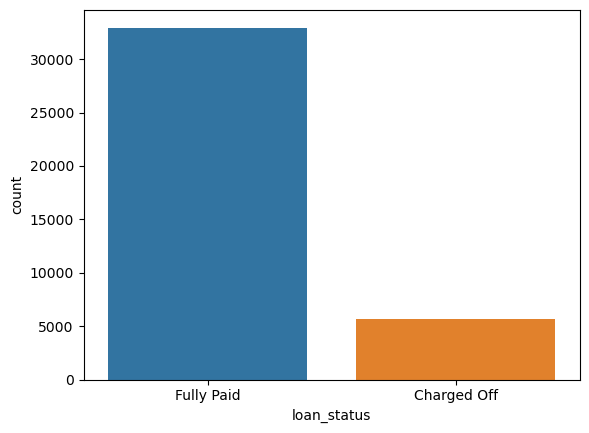

In [38]:
sns.countplot(df2, x="loan_status")
plt.show()

#### Observation: Number of Fully Paid are about 6 times more than Charged Off in the dataset

In [39]:
plt.rcParams['figure.figsize'] = [3, 3]

#### Numerical Columns

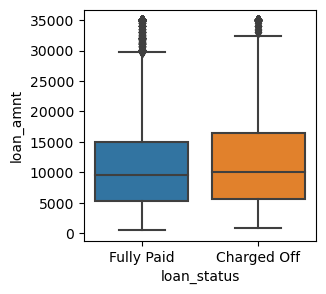

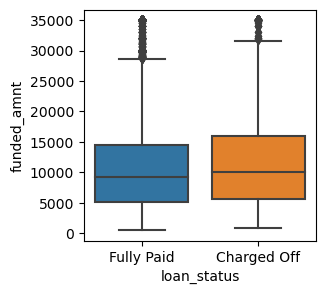

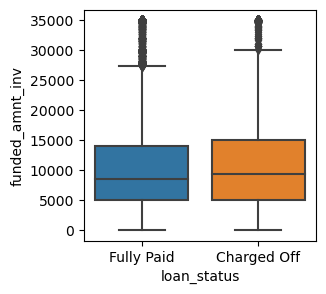

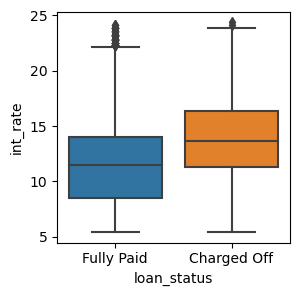

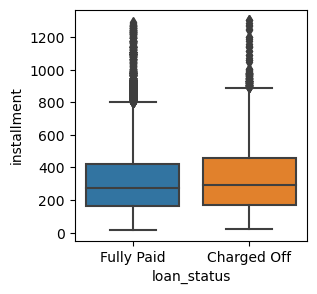

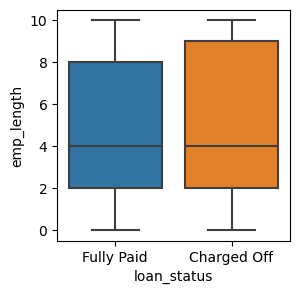

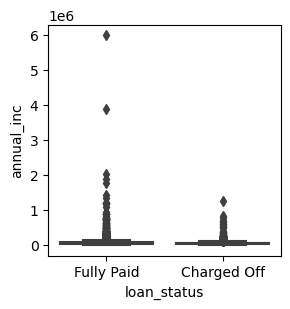

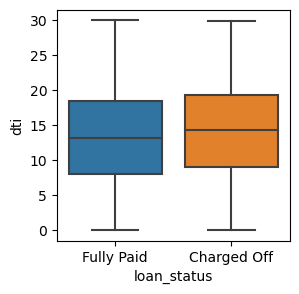

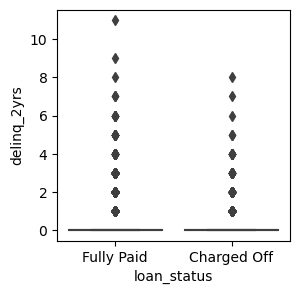

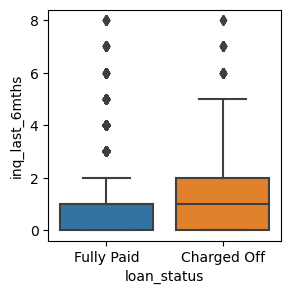

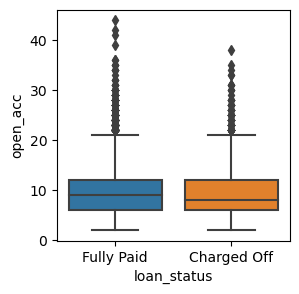

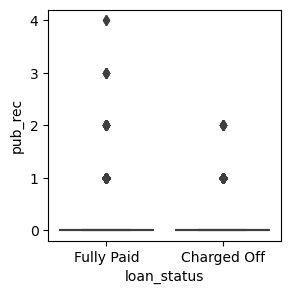

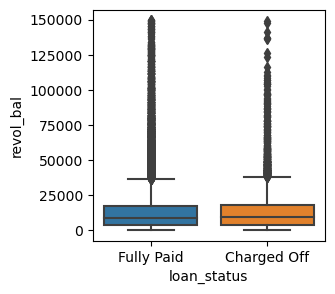

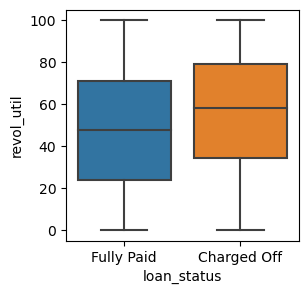

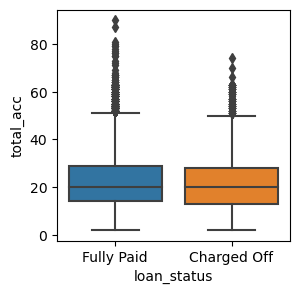

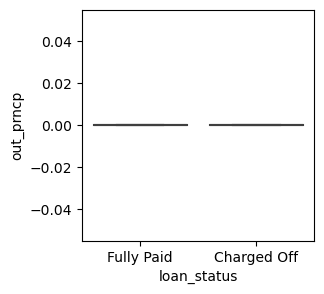

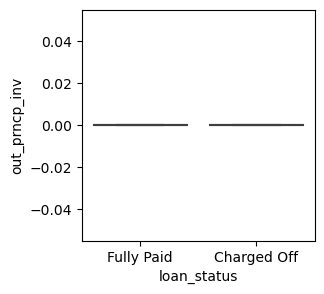

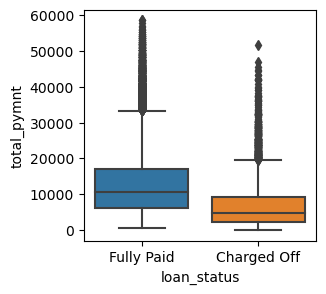

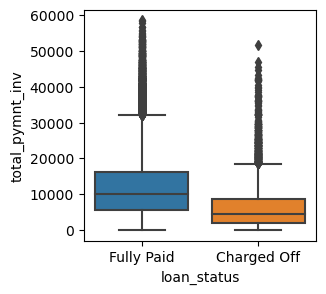

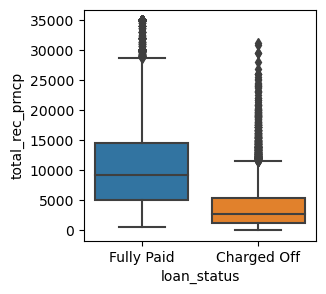

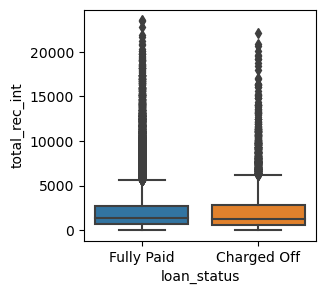

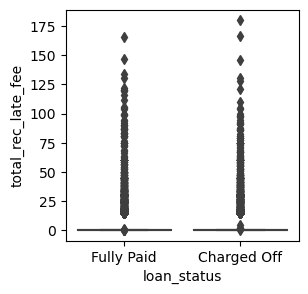

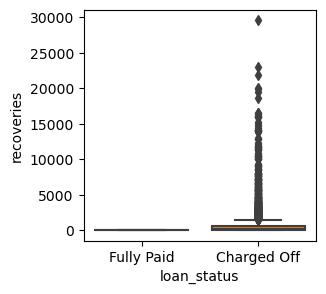

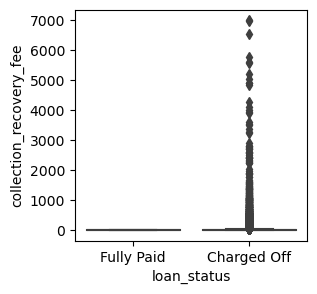

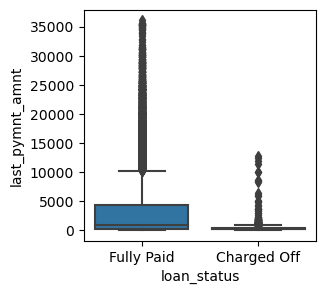

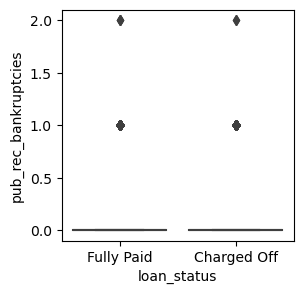

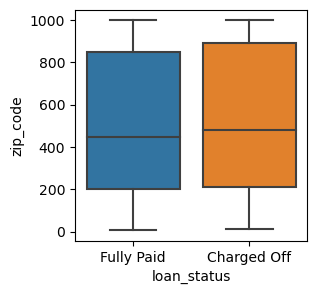

In [40]:
for col in cont_cols:
    if col != "loan_status":
        sns.boxplot(x=df2.loan_status, y=df2[col])
        plt.show()

##### Boxplot for annual_inc without outliners

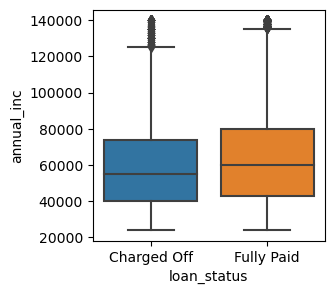

In [41]:
df_annual_inc_95per = df2[(df2.annual_inc<np.percentile(df2.annual_inc,95))&(df2.annual_inc>np.percentile(df2.annual_inc,5))]
sns.boxplot(x=df_annual_inc_95per.loan_status, y=df_annual_inc_95per.annual_inc)
plt.show()

#### Observation:
##### No or low impact on loan status -<br/>loan_amnt, funded_amnt, funded_amnt_inv, installment, emp_length, delinq_2yrs, open_acc, pub_rec, revol_bal, total_acc, out_prncp, out_prncp_inv, total_rec_int, total_rec_late_fee, pub_rec_bankruptcies, zip_code

##### Also total_pymnt_inv and total_rec_prncp are similar to total_pymnt<br/> recoveries and collection_recovery_fee comes after they are marked as charged off, so could not be reason for defaulting

##### Has impact on loan status -<br/>int_rate, annual_inc, dti, inq_last_6mths, revol_util, total_pymnt, total_pymnt_inv, total_rec_prncp, last_pymnt_amnt

In [42]:
impact_cols = ["int_rate", "annual_inc", "dti", "inq_last_6mths", "revol_util", "total_pymnt", "last_pymnt_amnt","loan_status"]

##### Histogram of Charged Off without outliners

In [43]:
plt.rcParams['figure.figsize'] = [10, 3]
df3 = df[df.loan_status=="Charged Off"]

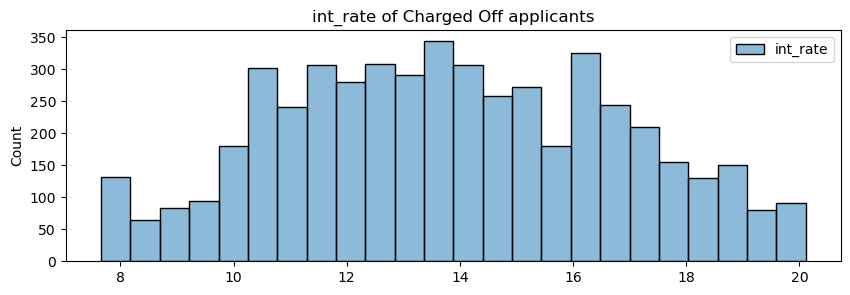

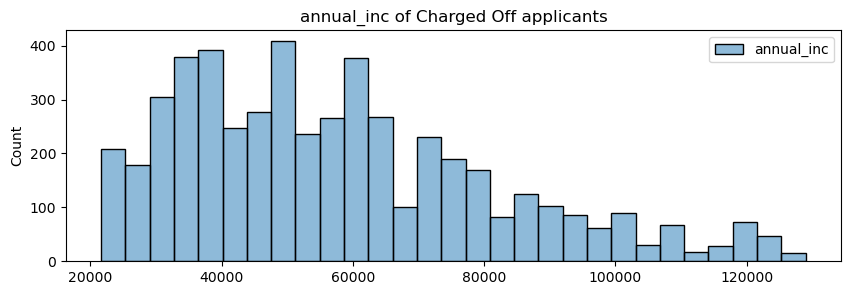

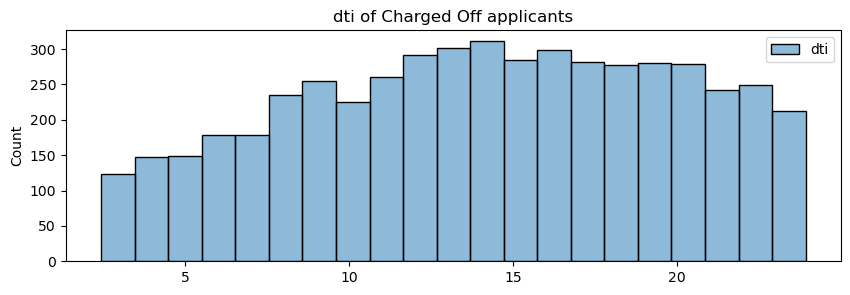

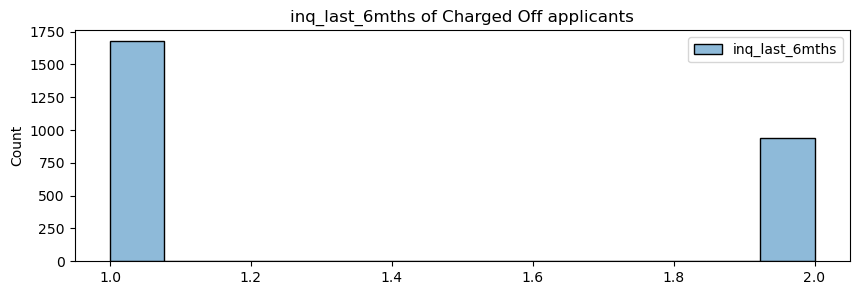

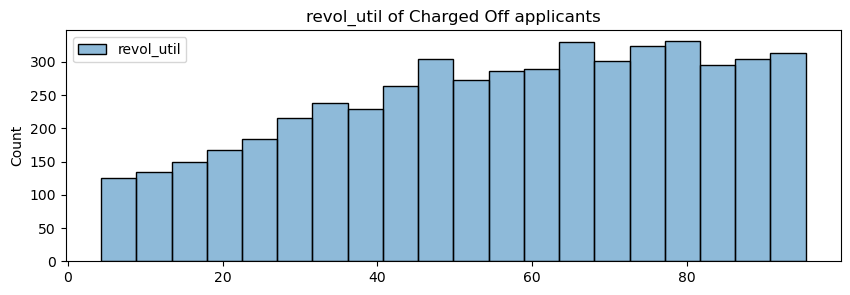

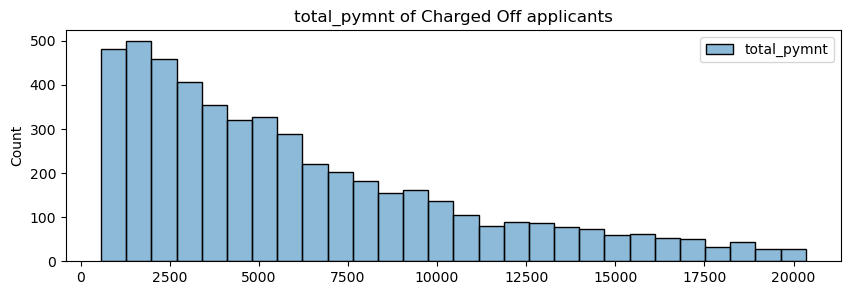

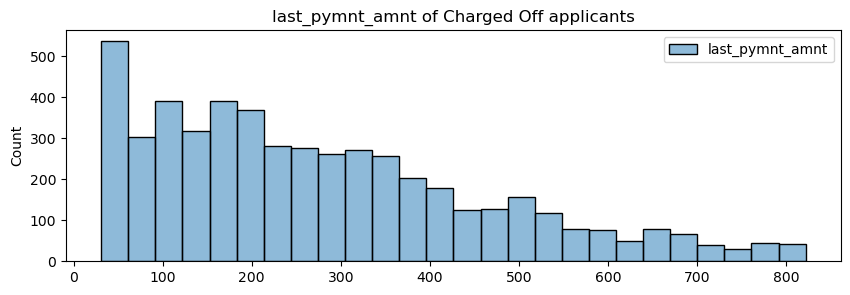

In [44]:
for col in impact_cols:
    if col!="loan_status":
        sns.histplot(df3[(df3[col]<np.percentile(df3[col],95)) & (df3[col]>np.percentile(df3[col],5))][[col]]).set_title(col+' of Charged Off applicants')
        plt.show()

#### Categorical Columns

In [45]:
plt.rcParams['figure.figsize'] = [15, 3]

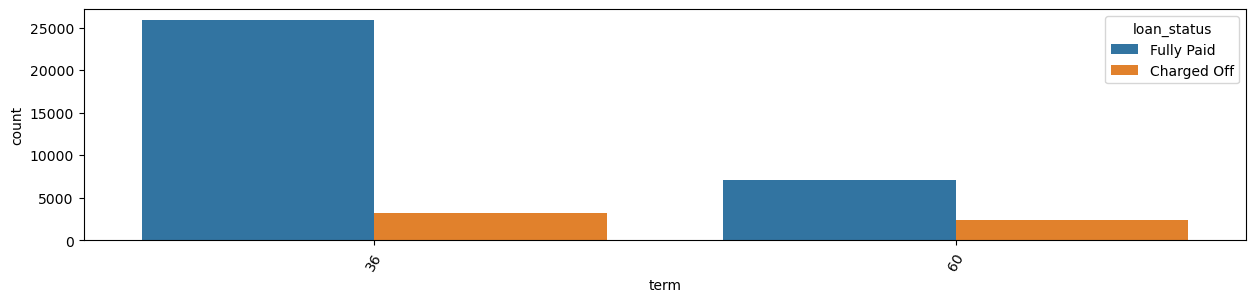

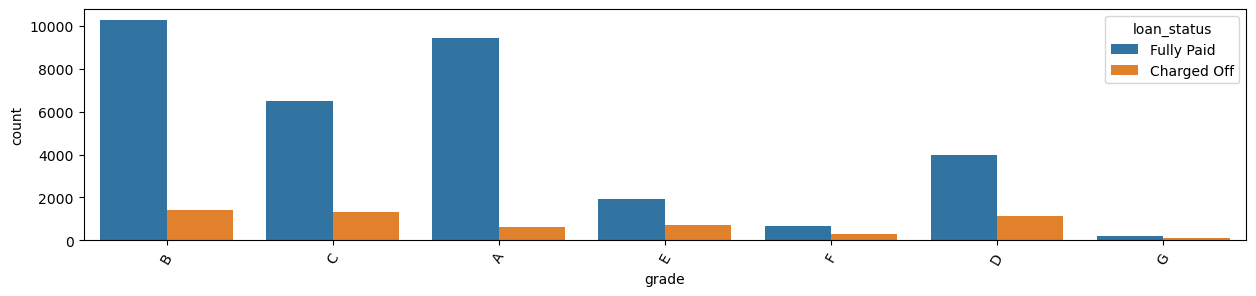

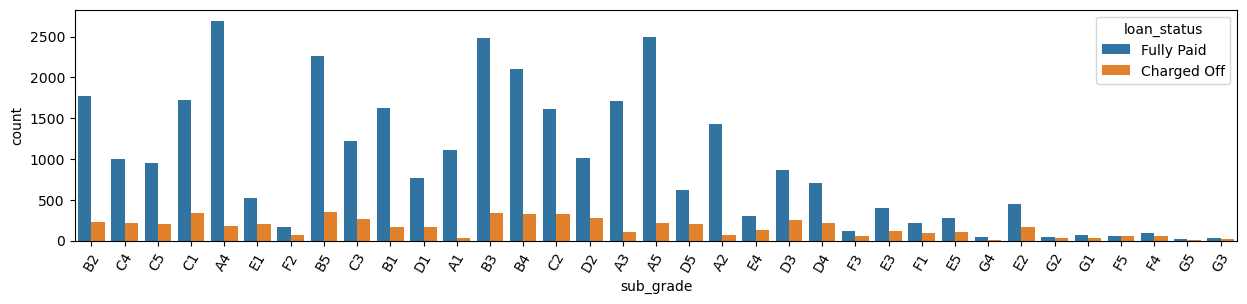

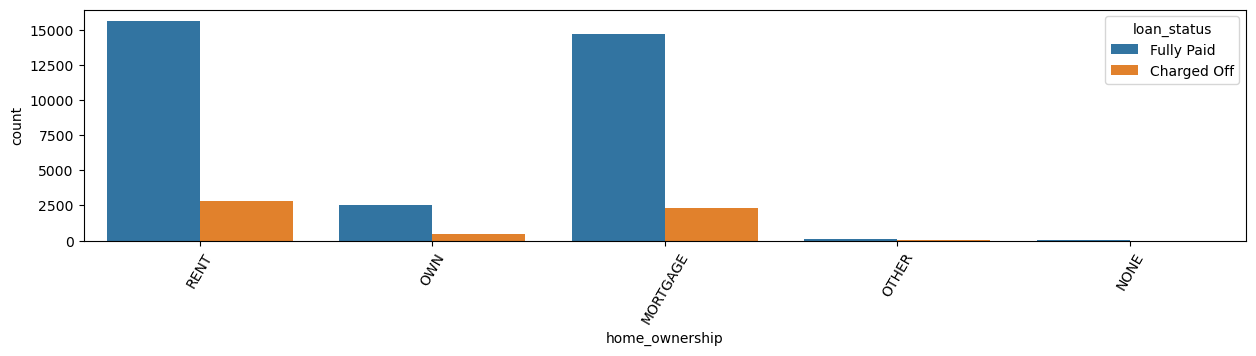

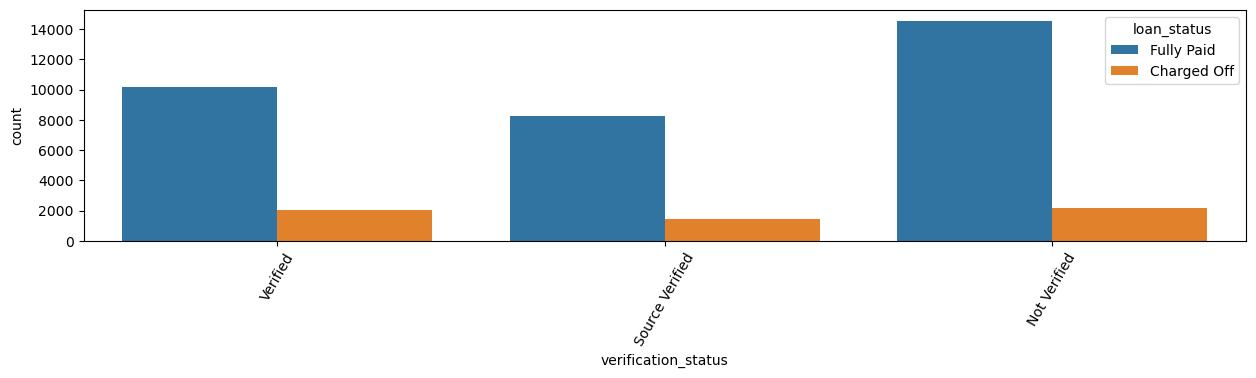

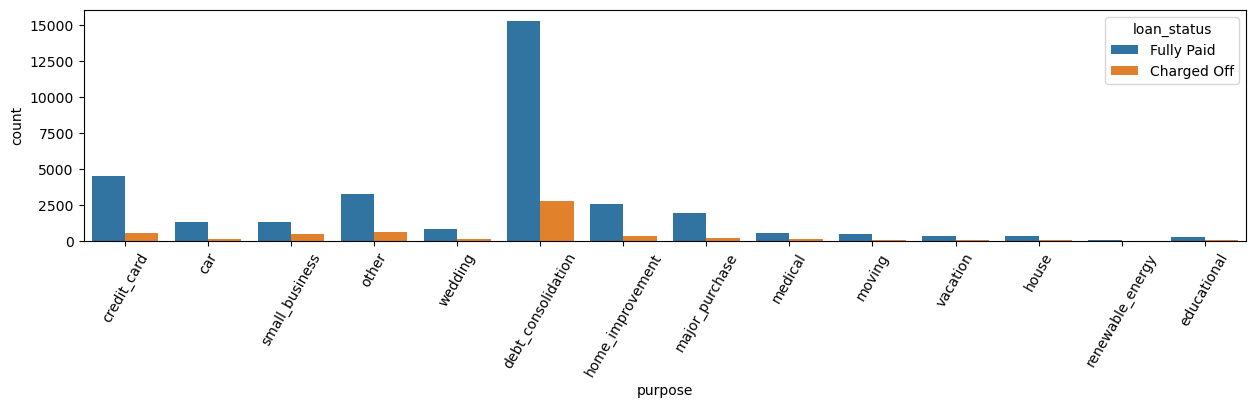

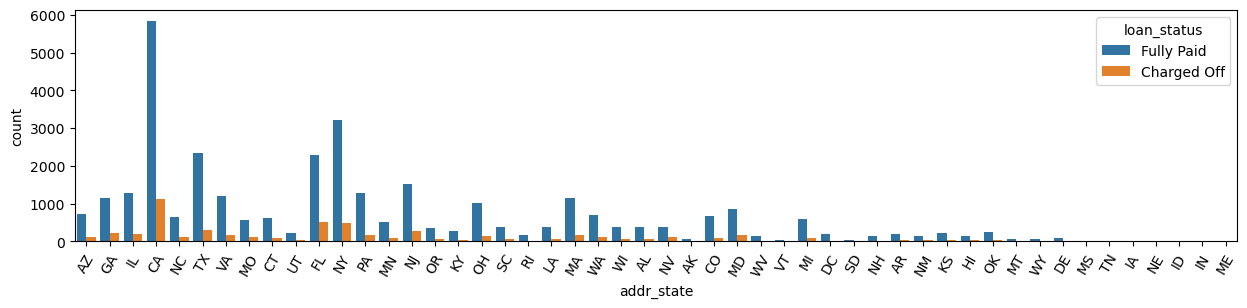

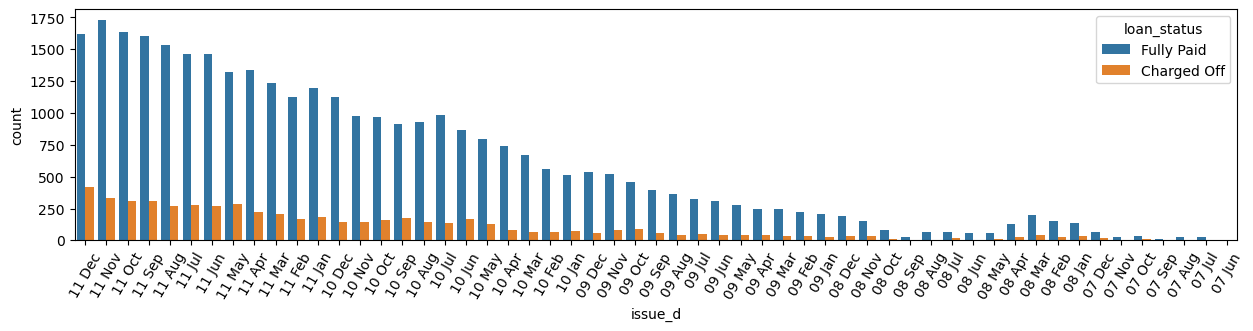

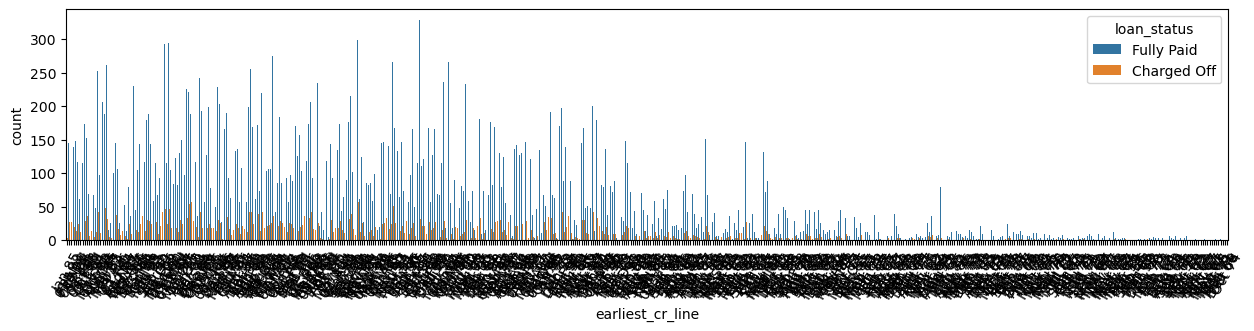

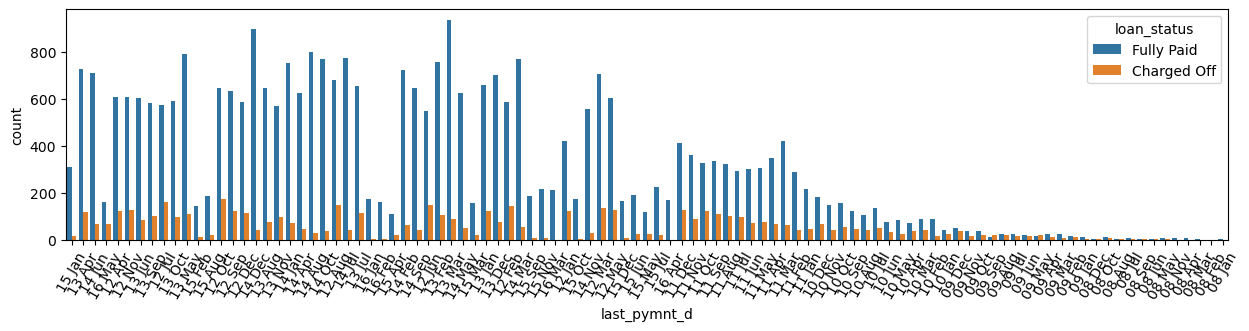

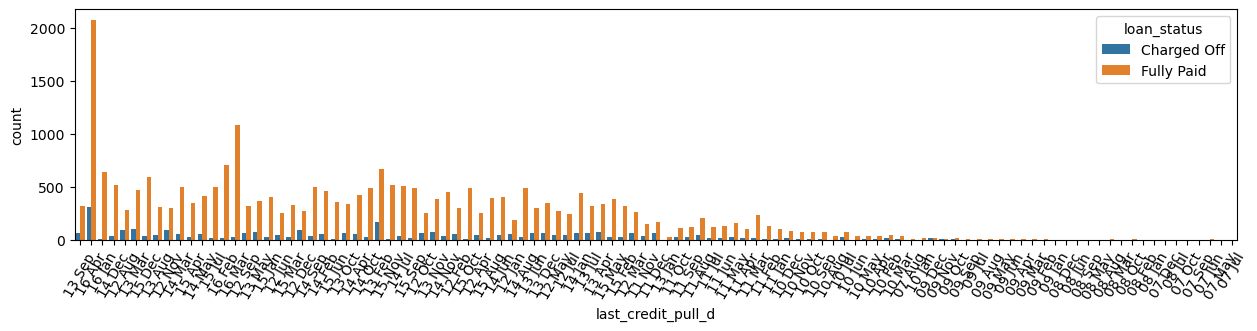

In [46]:
for col in cat_cols:
    if col != "loan_status":
        if col == "last_credit_pull_d":
            sns.countplot(data=df2[df2[col] != "16 May"],x=col,hue="loan_status")
        else:
            sns.countplot(data=df2,x=col,hue="loan_status")
        plt.xticks(rotation=60)
        plt.show()

#### Observation:
##### No or low impact on loan status -<br/>issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d

##### Has impact on loan status -<br/>term,grade,sub_grade,home_ownership,verification_status,purpose,addr_state

In [47]:
def getChargedOff(col):
    dfTotal = pd.DataFrame(df2.groupby([col])[col].count())
    dfTotal.columns = ["Total"]
    dfChargedOff = pd.DataFrame(df2[df2.loan_status=="Charged Off"].groupby([col])[col].count())
    dfChargedOff.columns = ["ChargedOff"]
    dfChargedOffPer = dfTotal.merge(dfChargedOff, on=col)
    dfChargedOffPer["ChargedOff%"] = round(dfChargedOffPer["ChargedOff"]/dfChargedOffPer["Total"]*100,2)
    return dfChargedOffPer.sort_values(["ChargedOff%"])

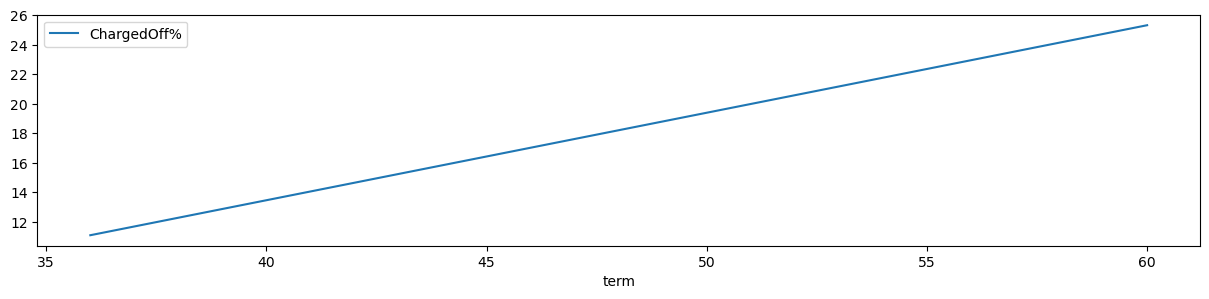

In [48]:
sns.lineplot(pd.DataFrame(getChargedOff("term")["ChargedOff%"]))
plt.show()

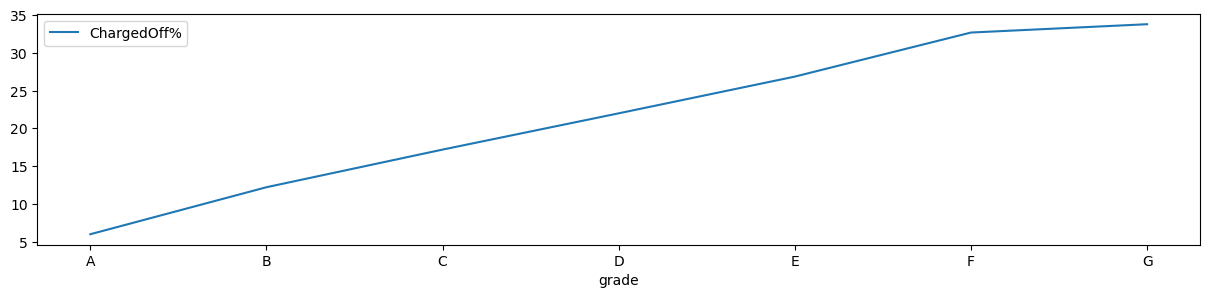

In [49]:
sns.lineplot(pd.DataFrame(getChargedOff("grade")["ChargedOff%"]))
plt.show()

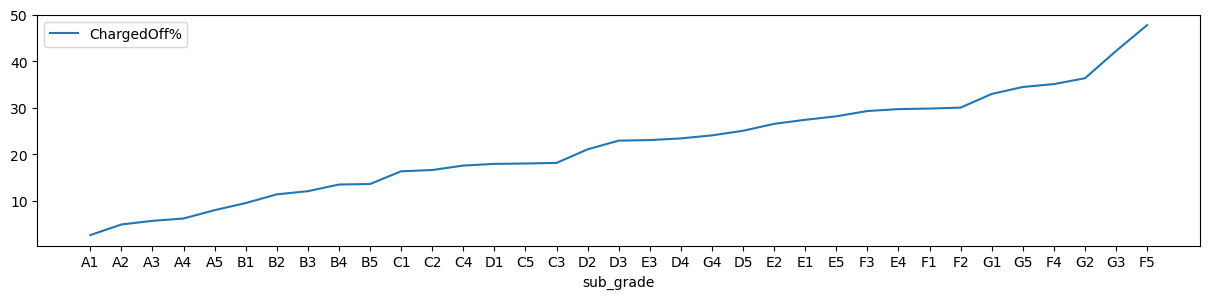

In [50]:
sns.lineplot(pd.DataFrame(getChargedOff("sub_grade")["ChargedOff%"]))
plt.show()

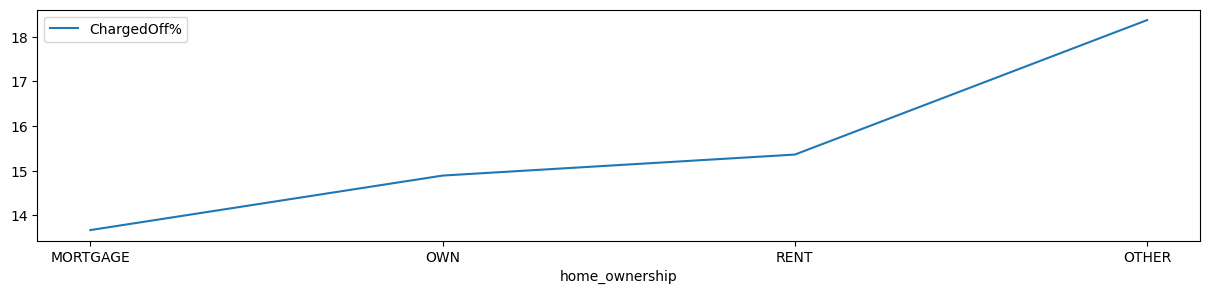

In [51]:
sns.lineplot(pd.DataFrame(getChargedOff("home_ownership")["ChargedOff%"]))
plt.show()

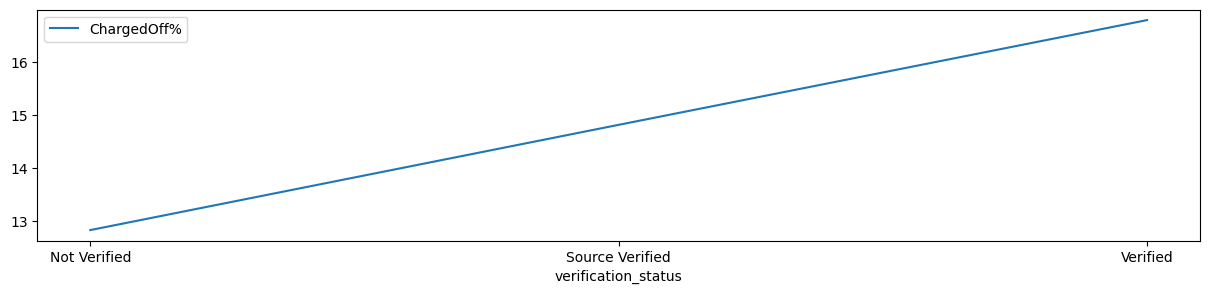

In [52]:
sns.lineplot(pd.DataFrame(getChargedOff("verification_status")["ChargedOff%"]))
plt.show()

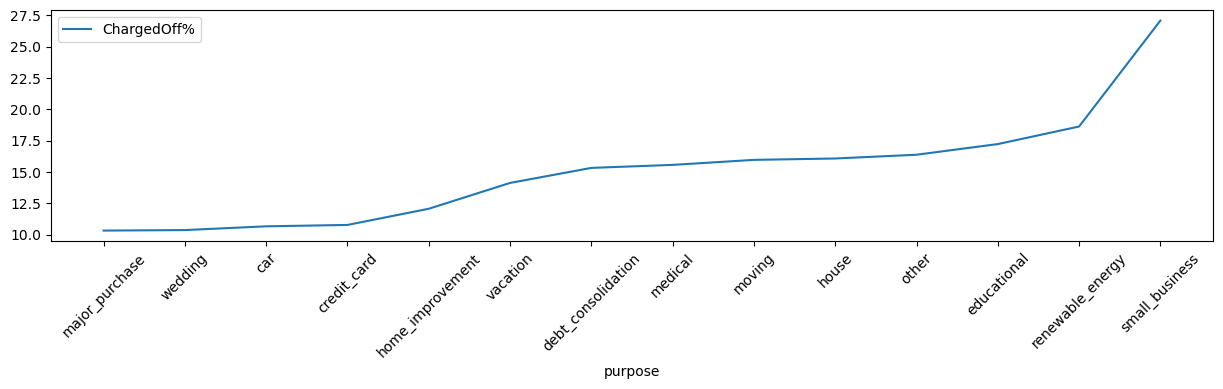

In [53]:
sns.lineplot(pd.DataFrame(getChargedOff("purpose")["ChargedOff%"]))
plt.xticks(rotation=45)
plt.show()

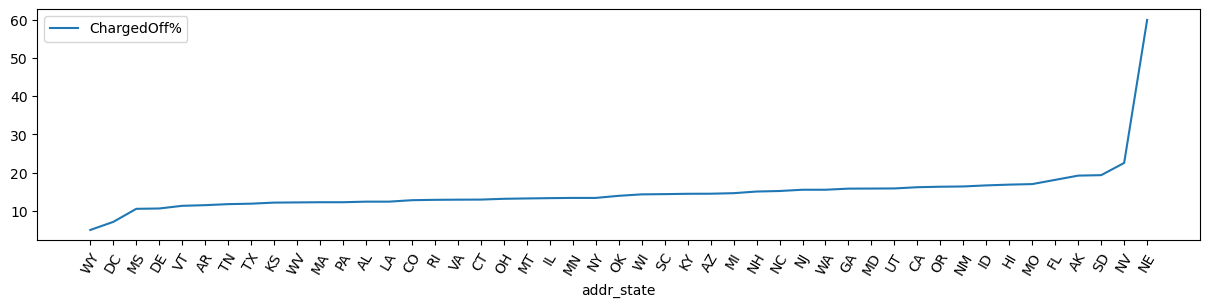

In [54]:
sns.lineplot(pd.DataFrame(getChargedOff("addr_state")["ChargedOff%"]))
plt.xticks(rotation=60)
plt.show()

### Numerical data
- loan_amnt is a weak indicator, higher amount indicates more chances of defaulting
- funded_amnt is a weak indicator, higher amount indicates more chances of defaulting
- int_rate is a strong indicator, int_rate between 11 and 16 indicates more chances of defaulting
- installment is a weak indicator, higher installment indicates more chances of defaulting
- emp_length is a weak indicator, higher duration indicates more chances of defaulting
- annual_inc is a strong indicator, lower amount indicates more chances of defaulting
- dti is a strong indicator, higher ratio indicates more chances of defaulting
- inq_last_6mths is a strong indicator, less inqueries indicates more chances of defaulting
- revol_util is a strong indicator, higher rate indicates more chances of defaulting
- total_pymnt is a strong indicator, lower amount indicates more chances of defaulting
- total_rec_prncp is a strong indicator, lower amount indicates more chances of defaulting
- last_pymnt_amnt is a strong indicator, lower amount indicates more chances of defaulting

### Categorical data
- term is a strong indicator, lower term indicates more chances of defaulting
- grade is a strong indicator, defaulting percentage increase going from A to G
- sub_grade is a strong indicator, defaulting percentage increase going from 1 to 5 for higher grades like A,B,C,D but for lower grades like E and F sub_grade has low impact
- home_ownership is a strong indicator, defaulting chance is low for Mortgage, higher for Own and Rent, and highest for Other
- verification_status is a strong indicator, defaulting chance is low for Not Verified, higher for Source Verified, and highest for Verified
- purpose is a strong indicator.<br/> major_purchase, wedding, car, credit_card, home_improvement has low chance of defaulting<br/> vacation, debt_consolidation, medical, moving, house, other, educational has higher chance of defaulting<br/> renewable_energy, small_business has the highest chance of defaulting
- addr_state is a weak indicator, all states has 10-20% chance of defaulting accept, WY has very low chance of defaulting, while NE has very high chance of defaulting (though we have only 5 records from NE)